<a href="https://colab.research.google.com/github/viettran02/AI_project/blob/main/AI_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5447d7286bdbf4d258757fbc5cdc82702b2bfa6549f89d7c75258939cf206d8c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


25.515706032513773


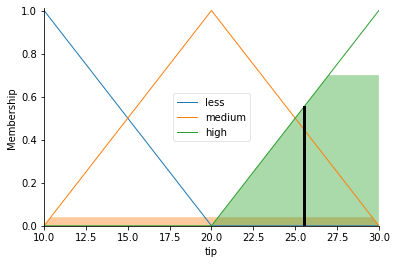

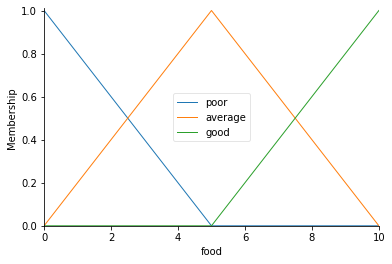

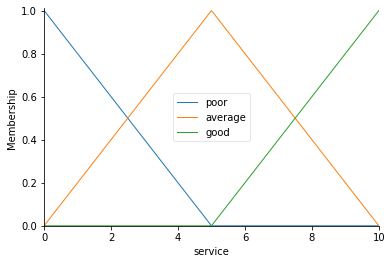

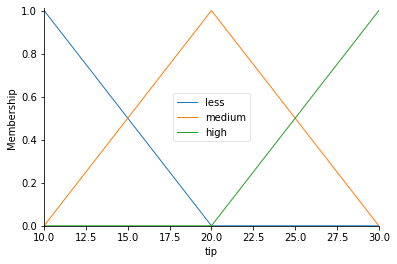

In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['medium']= fuzz.trimf(tip.universe,[10,20,30])
tip['high'] = fuzz.trimf(tip.universe,[20,30,30])

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'],tip['high'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'],tip['high'])
rule9=ctrl.Rule(food['good']&service['good'],tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)
food.view()
service.view()
tip.view()


52.1866756967078


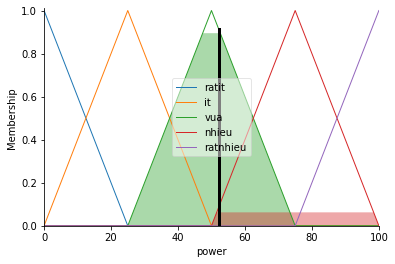

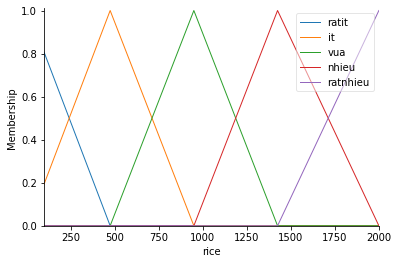

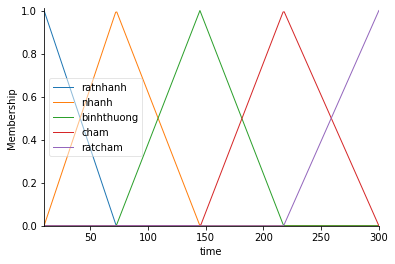

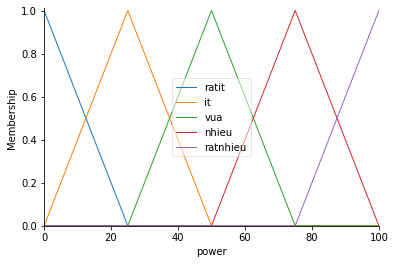

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['ratnhanh'] = fuzz.trimf(time.universe,[10,10,72.5])
time['nhanh']= fuzz.trimf(time.universe,[10,72.5,145])
time['binhthuong'] = fuzz.trimf(time.universe,[72.5,145,217.5])
time['cham'] = fuzz.trimf(time.universe,[145.5,217.5,300])
time['ratcham'] = fuzz.trimf(time.universe,[217.5,300,300])

rice['ratit'] = fuzz.trimf(rice.universe,[10,10,475])
rice['it']= fuzz.trimf(rice.universe,[10,475,950])
rice['vua'] = fuzz.trimf(rice.universe,[475,950,1425])
rice['nhieu'] = fuzz.trimf(rice.universe,[950,1425,2000])
rice['ratnhieu'] = fuzz.trimf(rice.universe,[1425,2000,2000])

power['ratit'] = fuzz.trimf(power.universe,[0,0,25])
power['it']= fuzz.trimf(power.universe,[0,25,50])
power['vua'] = fuzz.trimf(power.universe,[25,50,75])
power['nhieu'] = fuzz.trimf(power.universe,[50,75,100])
power['ratnhieu'] = fuzz.trimf(power.universe,[75,100,100])

rule1=ctrl.Rule(time['ratcham']&rice['ratit'],power['ratit'])
rule2=ctrl.Rule(time['ratcham']&rice['it'],power['ratit'])
rule3=ctrl.Rule(time['ratcham']&rice['vua'],power['vua'])
rule4=ctrl.Rule(time['ratcham']&rice['nhieu'],power['vua'])
rule5=ctrl.Rule(time['ratcham']&rice['ratnhieu'],power['nhieu'])
rule6=ctrl.Rule(time['cham']&rice['ratit'],power['it'])
rule7=ctrl.Rule(time['cham']&rice['it'],power['it'])
rule8=ctrl.Rule(time['cham']&rice['vua'],power['vua'])
rule9=ctrl.Rule(time['cham']&rice['nhieu'],power['nhieu'])
rule10=ctrl.Rule(time['cham']&rice['ratnhieu'],power['nhieu'])
rule11=ctrl.Rule(time['binhthuong']&rice['ratit'],power['vua'])
rule12=ctrl.Rule(time['binhthuong']&rice['it'],power['it'])
rule13=ctrl.Rule(time['binhthuong']&rice['vua'],power['vua'])
rule14=ctrl.Rule(time['binhthuong']&rice['nhieu'],power['nhieu'])
rule15=ctrl.Rule(time['binhthuong']&rice['ratnhieu'],power['nhieu'])
rule16=ctrl.Rule(time['nhanh']&rice['ratit'],power['it'])
rule17=ctrl.Rule(time['nhanh']&rice['it'],power['vua'])
rule18=ctrl.Rule(time['nhanh']&rice['vua'],power['nhieu'])
rule19=ctrl.Rule(time['nhanh']&rice['nhieu'],power['ratnhieu'])
rule20=ctrl.Rule(time['nhanh']&rice['ratnhieu'],power['ratnhieu'])
rule21=ctrl.Rule(time['ratnhanh']&rice['ratit'],power['it'])
rule22=ctrl.Rule(time['ratnhanh']&rice['it'],power['vua'])
rule23=ctrl.Rule(time['ratnhanh']&rice['vua'],power['nhieu'])
rule24=ctrl.Rule(time['ratnhanh']&rice['nhieu'],power['ratnhieu'])
rule25=ctrl.Rule(time['ratnhanh']&rice['ratnhieu'],power['ratnhieu'])

powervalue_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule15,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powervalue = ctrl.ControlSystemSimulation(powervalue_ctrl)
powervalue.input['time'] = 150
powervalue.input['rice'] = 1000
powervalue.compute()
print(powervalue.output['power'])
power.view(sim = powervalue)
rice.view()
time.view()
power.view()